### Importing necessary Libraries

In [37]:
# Install necessary packages and import libraries
# The first few lines ensure that TensorFlow, Scipy, and Matplotlib are installed.
# pip install tensorflow
# pip install scipy
# pip install matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Inline plotting with Matplotlib

In [38]:
# %matplotlib inline
# this  command ensures that plots are displayed directly in the notebook after being generated.

In [39]:
# Building a Convolutional Neural Network (CNN) model for terrain classification
# Importing layers from Keras for building the model architecture
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau


### Defining the CNN model
The following code defines a CNN model using TensorFlow's Keras API. The model is designed for terrain classification with a series of convolutional layers, pooling layers, and fully connected layers.

* **Convolutional Layers:** These layers apply filters to the input image, helping to detect various features (like edges, textures, etc.).
* **Max Pooling:** This operation reduces the spatial dimensions (width and height) of the output from the convolutional layers, which helps in reducing computational complexity and controlling overfitting.
* **Batch Normalization:** This technique normalizes the outputs of a previous activation layer, which helps stabilize learning and can accelerate training.
* **Dropout Layers:** These layers randomly set a fraction of the input units to zero during training to help prevent overfitting.
* **Softmax Layer:** This is used in the output layer for multi-class classification problems, providing probabilities for each class.


In [40]:
# Define the CNN model architecture with residual connections
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(64, 64, 3)),
        tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(4, activation='softmax')
    ])
    return model

model = create_model()

### Compiling the CNN model
The model is compiled using the Adam optimizer, with categorical crossentropy as the loss function, and accuracy as the evaluation metric.

In [41]:
# Compile the model
# Categorical crossentropy is used since the labels are one-hot encoded.
# Adam optimizer is used for its adaptive learning rate.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Data Augmentation and Preprocessing
This section applies data augmentation techniques using the `ImageDataGenerator` from Keras to generate more training samples and preprocess the images. These operations include rescaling, rotating, shifting, and flipping.


In [42]:
# Data augmentation and preprocessing for training and validation datasets
# The ImageDataGenerator applies various transformations to augment the training data
# Data augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2,
    height_shift_range=0.2
)

# Validation dataset (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

### Loading and Preparing the Data
In this section, the training and validation data are loaded from the respective directories, and the images are prepared for the model using the augmentation techniques defined earlier.


In [43]:
# Assuming you've created 'train_subset' and 'test_subset' directories
training_set = train_datagen.flow_from_directory(
    r"D:\Jupyter Notebook\Contribution\Terrain-Recognition\Data Main\train",
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    r"D:\Jupyter Notebook\Contribution\Terrain-Recognition\Data Main\test",
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical'
)


Found 10008 images belonging to 4 classes.
Found 1008 images belonging to 4 classes.


In [44]:
# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return 1e-2
    else:
        return 1e-3

lr_schedule = LearningRateScheduler(scheduler)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 31, 31, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 256)                 │           1,0

 Total params: 6,136,004 (23.41 MB)

 Trainable params: 6,130,948 (23.39 MB)

 Non-trainable params: 5,056 (19.75 KB)

### Training the CNN Model
The model is trained using the training and validation data. The training process is monitored, and a learning rate scheduler is used to adjust the learning rate dynamically during training.

In [48]:
# Train the model
modelZ = model.fit(
    training_set,
    steps_per_epoch=64,
    epochs=20,
    validation_data=test_set,
    validation_steps=7,
    callbacks=[lr_schedule, lr_reduction]
)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 486ms/step - accuracy: 0.8535 - loss: 0.3786 - val_accuracy: 0.5179 - val_loss: 1.5194 - learning_rate: 0.0100
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 402ms/step - accuracy: 0.8971 - loss: 0.2851 - val_accuracy: 0.1897 - val_loss: 3.7531 - learning_rate: 0.0100
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.8852 - loss: 0.3269 - val_accuracy: 0.6250 - val_loss: 1.7674 - learning_rate: 0.0100
Epoch 4/20


C:\Users\DEEPANSHU\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 383ms/step - accuracy: 0.8750 - loss: 0.3092 - val_accuracy: 0.7857 - val_loss: 0.5406 - learning_rate: 0.0100
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 346ms/step - accuracy: 0.9029 - loss: 0.2521 - val_accuracy: 0.7545 - val_loss: 0.6451 - learning_rate: 0.0100
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.8819 - loss: 0.3170 - val_accuracy: 0.6429 - val_loss: 1.7605 - learning_rate: 0.0100
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 349ms/step - accuracy: 0.9028 - loss: 0.2596 - val_accuracy: 0.8683 - val_loss: 0.2267 - learning_rate: 0.0100
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.9109 - loss: 0.2110 - val_accuracy: 0.8013 - val_loss: 0.3949 - learning_rate: 0.0100
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.8970 - loss: 0.2686 - val_accuracy: 0.9286 - val_loss: 0.6297 - learning_rate: 0.0100
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 341ms/step - accuracy: 0.9183 - loss: 0.2074 - val_a

### Plotting Training and Validation Accuracy
This section plots the training and validation accuracy and loss over time to visualize how the model performs during training.

In [52]:
# Print the final training and validation accuracy
train_accuracy = modelZ.history['accuracy'][-1]
val_accuracy = modelZ.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

Final Training Accuracy: 0.9561
Final Validation Accuracy: 0.9308


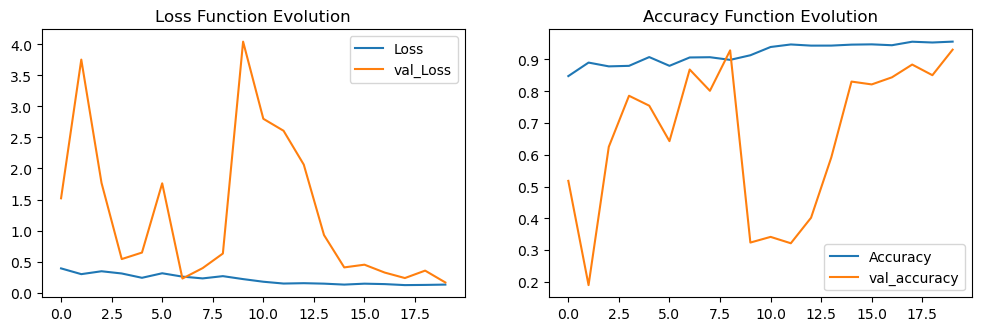

In [54]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(modelZ.history['loss'], label='Loss')
plt.plot(modelZ.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(modelZ.history['accuracy'], label='Accuracy')
plt.plot(modelZ.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.show()


A confusion matrix helps visualize the performance of a classification model by showing the true vs. predicted classifications. It can be useful to identify which classes are being confused.

### Saving the Trained Model
After training, the model is saved to a file for future use.


In [ ]:
# model.save('modelZ.h5')

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the model
# model = load_model('saved_model/my_model')

In [ ]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))